# Footprint comparison

### Default computing time

In [8]:
 n=0
generatingFun,sign = {0:('Bess2D_generating_real',(-1)**(n/2)),
                          1:('Bess2D_generating_imag',(-1)**((n-1)/2))}[n%2]

In [9]:
generatingFun,sign


('Bess2D_generating_real', 1.0)

In [ ]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LogNorm
import numpy as np
import time
from rich.progress import track
from rich.progress import Progress

import Backend.InteractionPoint as inp
import Backend.Detuning as dtune
import Backend.Footprint as fp
import Backend.BeamPhysics as BP


#Dummy beam
#=========================================================
B1 = inp.Beam('b1',None,None,
              Nb       = 1.15e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)


for _r in [0.5,2]:
    for _dx in [2,6,10,14,18]:
        # Generating Coord grid
        #=========================================================
        #coordinates = fp.generate_coordGrid([0.05,10],[0.01*np.pi/2,0.99*np.pi/2],labels = ['r_n','theta_n'],nPoints=500)
        coordinates = fp.generate_coordGrid(np.linspace(0.5,10,20),
                                            np.linspace(0.01*np.pi/2,0.99*np.pi/2,4),labels = ['r_n','theta_n'])

        coordinates.insert(0,'x_n',coordinates['r_n']*np.cos(coordinates['theta_n']))
        coordinates.insert(1,'y_n',coordinates['r_n']*np.sin(coordinates['theta_n']))


        coordinates.insert(0,'J_x',(coordinates['x_n']**2)*B1.emittx/2)
        coordinates.insert(1,'J_y',(coordinates['y_n']**2)*B1.emitty/2)

        coordinates.sort_values(by=['r_n'],inplace=True)
        #=========================================================



        coordinates.insert(1,'DQx',np.nan)
        coordinates.insert(2,'DQy',np.nan)
        coordinates.insert(3,'Elapsed',np.nan)
        for index, coord in track(coordinates.iterrows(),total=len(coordinates)):
            s_time = time.time()
            DQx,DQy = dtune.DQx_DQy(   ax   = [coord['x_n']],
                                       ay   = [coord['y_n']],
                                       r    = _r,
                                       dx_n = _dx,
                                       dy_n = 0,
                                       xi   = B1.xi)

            coordinates.loc[index,'DQx']     = DQx[0]
            coordinates.loc[index,'DQy']     = DQy[0]
            coordinates.loc[index,'Elapsed'] = time.time()-s_time


            

        fig,axes = plt.subplots(1,2,figsize=(8,4))
        plt.suptitle(f'(r,dx): ({_r},{_dx})\nTotal Elapse: {np.sum(coordinates["Elapsed"]):.3f} s ({len(coordinates)} calls)\nMax: {np.max(coordinates["Elapsed"])/1e-3:.3f} ms, Min: {np.min(coordinates["Elapsed"])/1e-3:.3f} ms')

        plt.sca(axes[0])
        plt.scatter(coordinates['x_n'],coordinates['y_n'],s=8, c=coordinates['Elapsed'],alpha=0.5,norm = LogNorm())
        plt.axis('equal')

        plt.sca(axes[1])
        plt.scatter(coordinates['DQx'],coordinates['DQy'],s=8, c=coordinates['Elapsed'],alpha=0.5,norm = LogNorm())
        plt.axis('equal')
        cbar = plt.colorbar()
        plt.tight_layout()


Output()

Output()

Output()

Output()

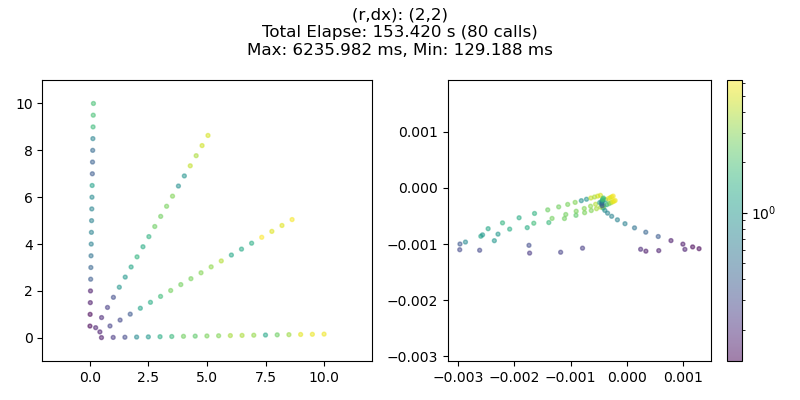

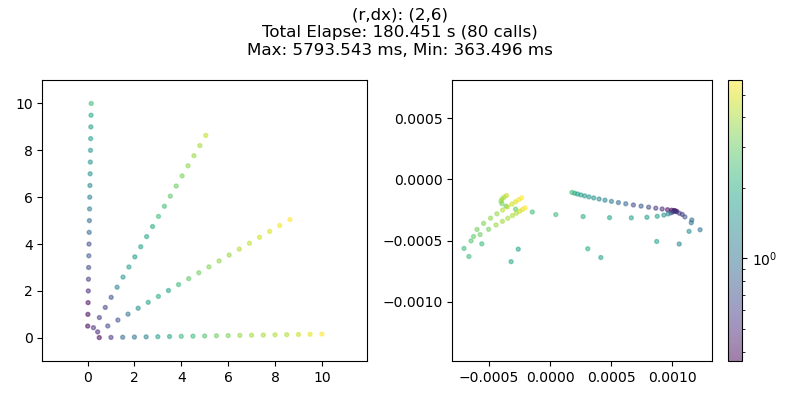

In [1]:

%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LogNorm
import numpy as np
import time
from rich.progress import track
from rich.progress import Progress

import Backend.InteractionPoint as inp
import Backend.Detuning as dtune
import Backend.Footprint as fp
import Backend.BeamPhysics as BP


#Dummy beam
#=========================================================
B1 = inp.Beam('b1',None,None,
              Nb       = 1.15e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)

# Generating contour
#=========================================================
p_by_seg = 200

cr     = np.array(list(np.linspace(0,10,p_by_seg)) + list(10*np.ones(p_by_seg))             + list(np.flip(np.linspace(0,10,p_by_seg))))
ctheta = np.array(list(np.zeros(p_by_seg))         + list(np.linspace(0,np.pi/2,p_by_seg)) + list(np.pi/2*np.ones(p_by_seg)))
ctour = pd.DataFrame({'r_n':cr,'theta_n':ctheta})

ctour.insert(0,'x_n',ctour['r_n']*np.cos(ctour['theta_n']))
ctour.insert(1,'y_n',ctour['r_n']*np.sin(ctour['theta_n']))


ctour.insert(0,'J_x',(ctour['x_n']**2)*B1.emittx/2)
ctour.insert(1,'J_y',(ctour['y_n']**2)*B1.emitty/2)
#=========================================================



for _r in [2]:
    for _dx in [2,6]:
        # Generating Coord grid
        #=========================================================
        #coordinates = fp.generate_coordGrid([0.05,10],[0.01*np.pi/2,0.99*np.pi/2],labels = ['r_n','theta_n'],nPoints=500)
        coordinates = fp.generate_coordGrid(np.linspace(0.5,10,20),
                                            np.linspace(0.01*np.pi/2,0.99*np.pi/2,4),labels = ['r_n','theta_n'])

        coordinates.insert(0,'x_n',coordinates['r_n']*np.cos(coordinates['theta_n']))
        coordinates.insert(1,'y_n',coordinates['r_n']*np.sin(coordinates['theta_n']))


        coordinates.insert(0,'J_x',(coordinates['x_n']**2)*B1.emittx/2)
        coordinates.insert(1,'J_y',(coordinates['y_n']**2)*B1.emitty/2)

        coordinates.sort_values(by=['r_n'],inplace=True)
        #=========================================================



        coordinates.insert(1,'DQx',np.nan)
        coordinates.insert(2,'DQy',np.nan)
        coordinates.insert(3,'Elapsed',np.nan)
        for index, coord in track(coordinates.iterrows(),total=len(coordinates)):
            s_time = time.time()
            DQx,DQy = dtune.DQx_DQy(   ax   = [coord['x_n']],
                                       ay   = [coord['y_n']],
                                       r    = _r,
                                       dx_n = _dx,
                                       dy_n = 0,
                                       xi   = B1.xi)

            coordinates.loc[index,'DQx']     = DQx[0]
            coordinates.loc[index,'DQy']     = DQy[0]
            coordinates.loc[index,'Elapsed'] = time.time()-s_time

            
        # Comparing with octupolar LR
        k1 = B1.strong_knl(_dx,0)[0][1]
        k3 = B1.strong_knl(_dx,0)[0][3]
        betx = 100

        c_DQx,c_DQy = dtune.BBLR_octupole(ctour['J_x'],
                                            ctour['J_y'],
                                              betx = betx,
                                              bety = _r*betx,
                                              k1   = k1,
                                              k3   = k3)
            

        fig,axes = plt.subplots(1,2,figsize=(8,4))
        plt.suptitle(f'(r,dx): ({_r},{_dx})\nTotal Elapse: {np.sum(coordinates["Elapsed"]):.3f} s ({len(coordinates)} calls)\nMax: {np.max(coordinates["Elapsed"])/1e-3:.3f} ms, Min: {np.min(coordinates["Elapsed"])/1e-3:.3f} ms')

        plt.sca(axes[0])
        plt.scatter(coordinates['x_n'],coordinates['y_n'],s=8, c=coordinates['Elapsed'],alpha=0.5,norm = LogNorm())
        plt.axis('equal')

        plt.sca(axes[1])
        plt.scatter(coordinates['DQx'],coordinates['DQy'],s=8, c=coordinates['Elapsed'],alpha=0.5,norm = LogNorm())
        plt.plot(c_DQx,c_DQy,'red',alpha=0.5)
        plt.axis('equal')
        cbar = plt.colorbar()
        plt.tight_layout()






Output()

Output()

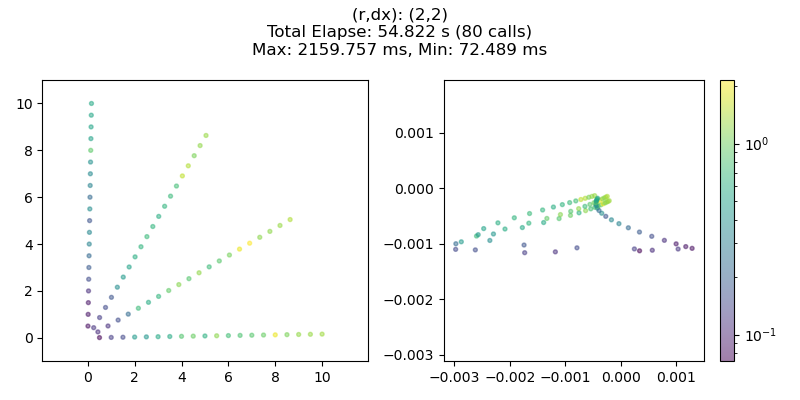

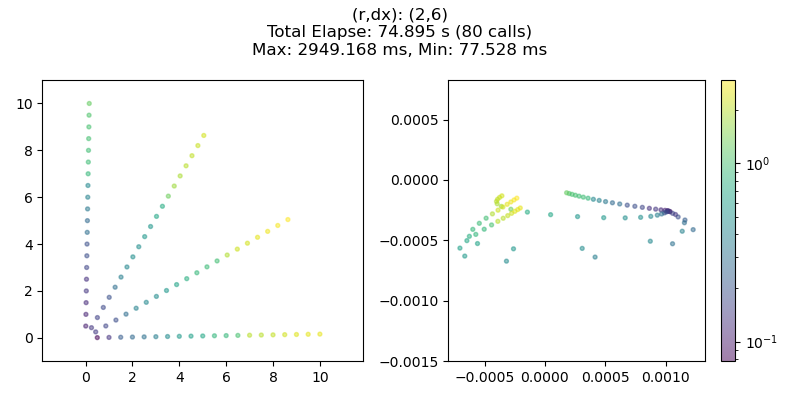

In [2]:

%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LogNorm
import numpy as np
import time
from rich.progress import track
from rich.progress import Progress

import Backend.InteractionPoint as inp
import Backend.Detuning as dtune
import Backend.Footprint as fp
import Backend.BeamPhysics as BP


#Dummy beam
#=========================================================
B1 = inp.Beam('b1',None,None,
              Nb       = 1.15e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)

# Generating contour
#=========================================================
p_by_seg = 200

cr     = np.array(list(np.linspace(0,10,p_by_seg)) + list(10*np.ones(p_by_seg))             + list(np.flip(np.linspace(0,10,p_by_seg))))
ctheta = np.array(list(np.zeros(p_by_seg))         + list(np.linspace(0,np.pi/2,p_by_seg)) + list(np.pi/2*np.ones(p_by_seg)))
ctour = pd.DataFrame({'r_n':cr,'theta_n':ctheta})

ctour.insert(0,'x_n',ctour['r_n']*np.cos(ctour['theta_n']))
ctour.insert(1,'y_n',ctour['r_n']*np.sin(ctour['theta_n']))


ctour.insert(0,'J_x',(ctour['x_n']**2)*B1.emittx/2)
ctour.insert(1,'J_y',(ctour['y_n']**2)*B1.emitty/2)
#=========================================================



for _r in [2]:
    for _dx in [2,6]:
        # Generating Coord grid
        #=========================================================
        #coordinates = fp.generate_coordGrid([0.05,10],[0.01*np.pi/2,0.99*np.pi/2],labels = ['r_n','theta_n'],nPoints=500)
        coordinates = fp.generate_coordGrid(np.linspace(0.5,10,20),
                                            np.linspace(0.01*np.pi/2,0.99*np.pi/2,4),labels = ['r_n','theta_n'])

        coordinates.insert(0,'x_n',coordinates['r_n']*np.cos(coordinates['theta_n']))
        coordinates.insert(1,'y_n',coordinates['r_n']*np.sin(coordinates['theta_n']))


        coordinates.insert(0,'J_x',(coordinates['x_n']**2)*B1.emittx/2)
        coordinates.insert(1,'J_y',(coordinates['y_n']**2)*B1.emitty/2)

        coordinates.sort_values(by=['r_n'],inplace=True)
        #=========================================================



        coordinates.insert(1,'DQx',np.nan)
        coordinates.insert(2,'DQy',np.nan)
        coordinates.insert(3,'Elapsed',np.nan)
        for index, coord in track(coordinates.iterrows(),total=len(coordinates)):
            s_time = time.time()
            DQx,DQy = dtune.DQx_DQy(   ax   = [coord['x_n']],
                                       ay   = [coord['y_n']],
                                       r    = _r,
                                       dx_n = _dx,
                                       dy_n = 0,
                                       xi   = B1.xi)

            coordinates.loc[index,'DQx']     = DQx[0]
            coordinates.loc[index,'DQy']     = DQy[0]
            coordinates.loc[index,'Elapsed'] = time.time()-s_time

            
        # Comparing with octupolar LR
        k1 = B1.strong_knl(_dx,0)[0][1]
        k3 = B1.strong_knl(_dx,0)[0][3]
        betx = 100

        c_DQx,c_DQy = dtune.BBLR_octupole(ctour['J_x'],
                                            ctour['J_y'],
                                              betx = betx,
                                              bety = _r*betx,
                                              k1   = k1,
                                              k3   = k3)
            

        fig,axes = plt.subplots(1,2,figsize=(8,4))
        plt.suptitle(f'(r,dx): ({_r},{_dx})\nTotal Elapse: {np.sum(coordinates["Elapsed"]):.3f} s ({len(coordinates)} calls)\nMax: {np.max(coordinates["Elapsed"])/1e-3:.3f} ms, Min: {np.min(coordinates["Elapsed"])/1e-3:.3f} ms')

        plt.sca(axes[0])
        plt.scatter(coordinates['x_n'],coordinates['y_n'],s=8, c=coordinates['Elapsed'],alpha=0.5,norm = LogNorm())
        plt.axis('equal')

        plt.sca(axes[1])
        plt.scatter(coordinates['DQx'],coordinates['DQy'],s=8, c=coordinates['Elapsed'],alpha=0.5,norm = LogNorm())
        plt.plot(c_DQx,c_DQy,'red',alpha=0.5)
        plt.axis('equal')
        cbar = plt.colorbar()
        plt.tight_layout()






Output()

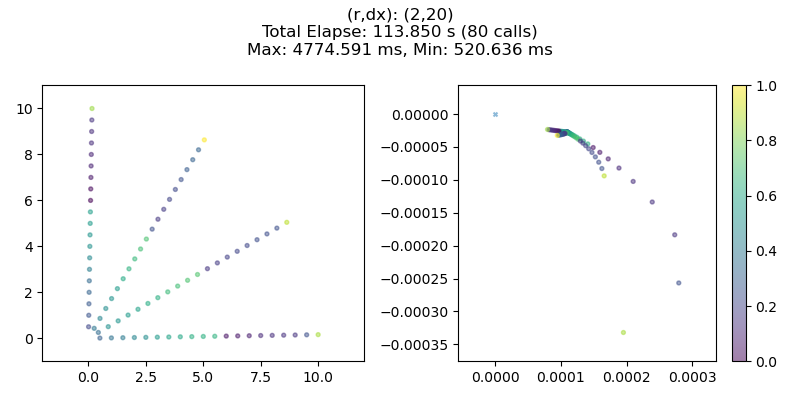

In [1]:

%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LogNorm
import numpy as np
import time
from rich.progress import track
from rich.progress import Progress

import Backend.InteractionPoint as inp
import Backend.Detuning as dtune
import Backend.Footprint as fp
import Backend.BeamPhysics as BP


#Dummy beam
#=========================================================
B1 = inp.Beam('b1',None,None,
              Nb       = 1.15e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)

# Generating contour
#=========================================================
p_by_seg = 200

cr     = np.array(list(np.linspace(0,10,p_by_seg)) + list(10*np.ones(p_by_seg))             + list(np.flip(np.linspace(0,10,p_by_seg))))
ctheta = np.array(list(np.zeros(p_by_seg))         + list(np.linspace(0,np.pi/2,p_by_seg)) + list(np.pi/2*np.ones(p_by_seg)))
ctour = pd.DataFrame({'r_n':cr,'theta_n':ctheta})

ctour.insert(0,'x_n',ctour['r_n']*np.cos(ctour['theta_n']))
ctour.insert(1,'y_n',ctour['r_n']*np.sin(ctour['theta_n']))


ctour.insert(0,'J_x',(ctour['x_n']**2)*B1.emittx/2)
ctour.insert(1,'J_y',(ctour['y_n']**2)*B1.emitty/2)
#=========================================================



for _r in [2]:
    for _dx in [20]:
        # Generating Coord grid
        #=========================================================
        #coordinates = fp.generate_coordGrid([0.05,10],[0.01*np.pi/2,0.99*np.pi/2],labels = ['r_n','theta_n'],nPoints=500)
        coordinates = fp.generate_coordGrid(np.linspace(0.5,10,20),
                                            np.linspace(0.01*np.pi/2,0.99*np.pi/2,4),labels = ['r_n','theta_n'])

        coordinates.insert(0,'x_n',coordinates['r_n']*np.cos(coordinates['theta_n']))
        coordinates.insert(1,'y_n',coordinates['r_n']*np.sin(coordinates['theta_n']))


        coordinates.insert(0,'J_x',(coordinates['x_n']**2)*B1.emittx/2)
        coordinates.insert(1,'J_y',(coordinates['y_n']**2)*B1.emitty/2)

        coordinates.sort_values(by=['r_n'],inplace=True)
        #=========================================================



        coordinates.insert(1,'DQx',np.nan)
        coordinates.insert(2,'DQy',np.nan)
        coordinates.insert(3,'Elapsed',np.nan)
        for index, coord in track(coordinates.iterrows(),total=len(coordinates)):
            s_time = time.time()
            DQx,DQy = dtune.DQx_DQy(   ax   = [coord['x_n']],
                                       ay   = [coord['y_n']],
                                       r    = _r,
                                       dx_n = _dx,
                                       dy_n = 0,
                                       xi   = B1.xi)

            coordinates.loc[index,'DQx']     = DQx[0]
            coordinates.loc[index,'DQy']     = DQy[0]
            coordinates.loc[index,'Elapsed'] = time.time()-s_time

            
        # Comparing with octupolar LR
        k1 = B1.strong_knl(_dx,0)[0][1]
        k3 = B1.strong_knl(_dx,0)[0][3]
        betx = 100

        c_DQx,c_DQy = dtune.BBLR_octupole(coord['J_x'],
                                            coord['J_y'],
                                              betx = betx,
                                              bety = _r*betx,
                                              k1   = k1,
                                              k3   = k3)
            

        fig,axes = plt.subplots(1,2,figsize=(8,4))
        plt.suptitle(f'(r,dx): ({_r},{_dx})\nTotal Elapse: {np.sum(coordinates["Elapsed"]):.3f} s ({len(coordinates)} calls)\nMax: {np.max(coordinates["Elapsed"])/1e-3:.3f} ms, Min: {np.min(coordinates["Elapsed"])/1e-3:.3f} ms')

        plt.sca(axes[0])
        plt.scatter(coordinates['x_n'],coordinates['y_n'],s=8, c=coordinates['Elapsed'],alpha=0.5,norm = LogNorm())
        plt.axis('equal')

        plt.sca(axes[1])
        plt.scatter(coordinates['DQx'],coordinates['DQy'],s=8, c=coordinates['Elapsed'],alpha=0.5,norm = LogNorm())
        plt.scatter(c_DQx,c_DQy,s=8,marker='x',alpha=0.5,norm = LogNorm())
        plt.axis('equal')
        cbar = plt.colorbar()
        plt.tight_layout()






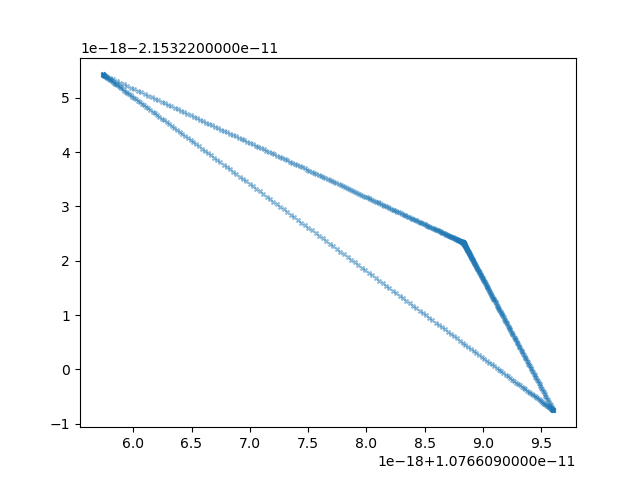

In [5]:
plt.figure()
plt.scatter(c_DQx,c_DQy,s=8,marker='x',alpha=0.5,norm = LogNorm())

### Generating amplitude distribution

In [119]:

for seq in ['lhcb1','lhcb2']:
    mad_track.input(f'use, sequence={seq};')
    mad_track.twiss()
    mad_track.survey()
    
    twiss = mad_track.table.twiss.dframe()
    survey = mad_track.table.survey.dframe()

    twiss.to_pickle(f"{seq}_twiss.pkl")
    survey.to_pickle(f"{seq}_survey.pkl")

In [113]:
%cd /home/pbelange/abp/Apps/lhcmask/python_examples/run3_collisions_wire
%run 000_pymask.py
%cd /home/pbelange/abp/footprint

Output()

/home/pbelange/abp/Apps/lhcmask/python_examples/run3_collisions_wire


bash: customization.bash: No such file or directory
GC Warning: Repeated allocation of very large block (appr. size 491520):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 491520):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 491520):
	May lead to memory leak and poor performance


IP beta test against knobs passed!
IP separation test against knobs passed!
IP beta test against knobs passed!
IP separation test against knobs passed!
Luminosities before leveling (crab cavities are not considered):
L in ip1 is 2.5834412775786533e+34 Hz/cm^2
L in ip2 is 1.5197302224975641e-93 Hz/cm^2
L in ip5 is 2.6254177545614155e+34 Hz/cm^2
L in ip8 is 0.0 Hz/cm^2
Start pythonic leveling:
L in ip1 is 2.583038716997818e+34 Hz/cm^2
L in ip2 is 2.0827129610563726e+30 Hz/cm^2
L in ip5 is 2.6252120368603296e+34 Hz/cm^2
L in ip8 is 2.002294633364364e+33 Hz/cm^2
bb_lr.l2b1_16 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l2b1_17 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l2b1_18 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l2b1_19 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l2b1_20 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l5b1_17 Reference systems are not 

mv: 'fc.2' and './fc.2' are the same file
mv: 'fc.3' and './fc.3' are the same file
mv: 'fc.3.aux' and './fc.3.aux' are the same file
mv: 'fc.34' and './fc.34' are the same file
mv: 'fc.8' and './fc.8' are the same file


Warning! on_bb_switch not present
Start building xtrack line...
Done building xtrack.
generating ./beeb0a5a253b49dd996c8841de0c83d4.c
the current directory is '/home/pbelange/abp/Apps/lhcmask/python_examples/run3_collisions_wire'
running build_ext
building 'beeb0a5a253b49dd996c8841de0c83d4' extension
gcc -pthread -B /home/pbelange/abp/Apps/miniconda/compiler_compat -Wno-unused-result -Wsign-compare -DNDEBUG -O2 -Wall -fPIC -O2 -isystem /home/pbelange/abp/Apps/miniconda/include -I/home/pbelange/abp/Apps/miniconda/include -fPIC -O2 -isystem /home/pbelange/abp/Apps/miniconda/include -fPIC -I/home/pbelange/abp/Apps/miniconda/include/python3.9 -c beeb0a5a253b49dd996c8841de0c83d4.c -o ./beeb0a5a253b49dd996c8841de0c83d4.o -std=c99 -O3 -Wno-unused-function
gcc -pthread -B /home/pbelange/abp/Apps/miniconda/compiler_compat -shared -Wl,-rpath,/home/pbelange/abp/Apps/miniconda/lib -Wl,-rpath-link,/home/pbelange/abp/Apps/miniconda/lib -L/home/pbelange/abp/Apps/miniconda/lib -L/home/pbelange/abp/App

/home/pbelange/abp/footprint
